# SATURN

In [ ]:
# the real notebook is in albedos folder for madden data

# Karkoschka Index Values 0 through 5
- 0: Wavelength, 3: Jupiter, 4: Saturn, 5:Titan, 6: Uranus, 7: Neptune

In [1]:
# Add the "KarkoschkaAlbedoJupiter.txt" file to "/CatalogofSolarSystemObjects/" folder and run the notebook from /Albedos

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
spec_1= np.genfromtxt('Saturn_Lundock081122withRing_Albedo.txt')
spec_2= np.genfromtxt('Saturn_Lundock080505withRing_Albedo.txt')
spec_3=np.genfromtxt('Saturn_Lundock081119withRing_Albedo.txt')
spec_4=np.genfromtxt('Saturn_Lundock081119NPole_Albedo.txt')
kark= np.genfromtxt('./../KarkoschkaAlbedoJupiter.txt')

In [4]:
df1 = pd.DataFrame(spec_1, columns=['Wavelength_1', 'Sat_1'])
df2 = pd.DataFrame(spec_2, columns=['Wavelength_2', 'Sat_2'])
df3 = pd.DataFrame(spec_3, columns=['Wavelength_3', 'Sat_3'])
df4 = pd.DataFrame(spec_4, columns=['Wavelength_4', 'Sat_4'])

# Concatenating DataFrames along columns
result_df = pd.concat([df1, df2, df3, df4], axis=1)

# Printing the result DataFrame
result_df

,Wavelength_1,Sat_1,Wavelength_2,Sat_2,Wavelength_3,Sat_3,Wavelength_4,Sat_4
0,0.450000,0.408353,0.450000,0.013012,0.450000,0.291921,0.450000,0.237237
1,0.451153,0.385750,0.451206,0.038105,0.451153,0.283165,0.451153,0.205031
2,0.452307,0.423389,0.452413,0.052052,0.452307,0.304289,0.452307,0.218154
3,0.453460,0.448490,0.453619,0.185615,0.453460,0.317228,0.453460,0.228090
4,0.454613,0.452856,0.454825,-1.865143,0.454613,0.317305,0.454613,0.227671
...,...,...,...,...,...,...,...,...
1768,2.489013,0.024421,NaN,NaN,2.489012,0.024715,2.489012,0.024397
1769,2.490166,-0.006990,NaN,NaN,2.490165,0.025726,2.490165,0.026141
1770,2.491319,-0.003289,NaN,NaN,2.491318,0.026809,2.491318,0.028393
1771,2.492473,-0.003185,NaN,NaN,2.492472,0.027627,2.492471,0.031025


In [5]:
median_vals= []

# Assuming you have a DataFrame named result_df with columns 'Nep_1', 'Nep_2', 'Nep_3', 'Nep_4'

# Calculate median of values in each row for columns 'Nep_1' to 'Nep_4'
result_df['Median_nonpolar'] = result_df[['Sat_1', 'Sat_2', 'Sat_3']].median(axis=1)
result_df['Median_all_vals'] = result_df[['Sat_1', 'Sat_2', 'Sat_3', 'Sat_4']].median(axis=1)
result_df['Median_Wav_nonpolar'] = result_df[['Wavelength_1', 'Wavelength_2', 'Wavelength_3']].median(axis=1)
result_df['Median_Wav_all_vals'] = result_df[['Wavelength_1', 'Wavelength_2', 'Wavelength_3', 'Wavelength_4']].median(axis=1)

# If you want to store the median for each row in a separate variable, you could do:
median_values = result_df[['Sat_1', 'Sat_2', 'Sat_3', 'Sat_4']].median(axis=1)

# Printing the median values for each row
#print(median_values)

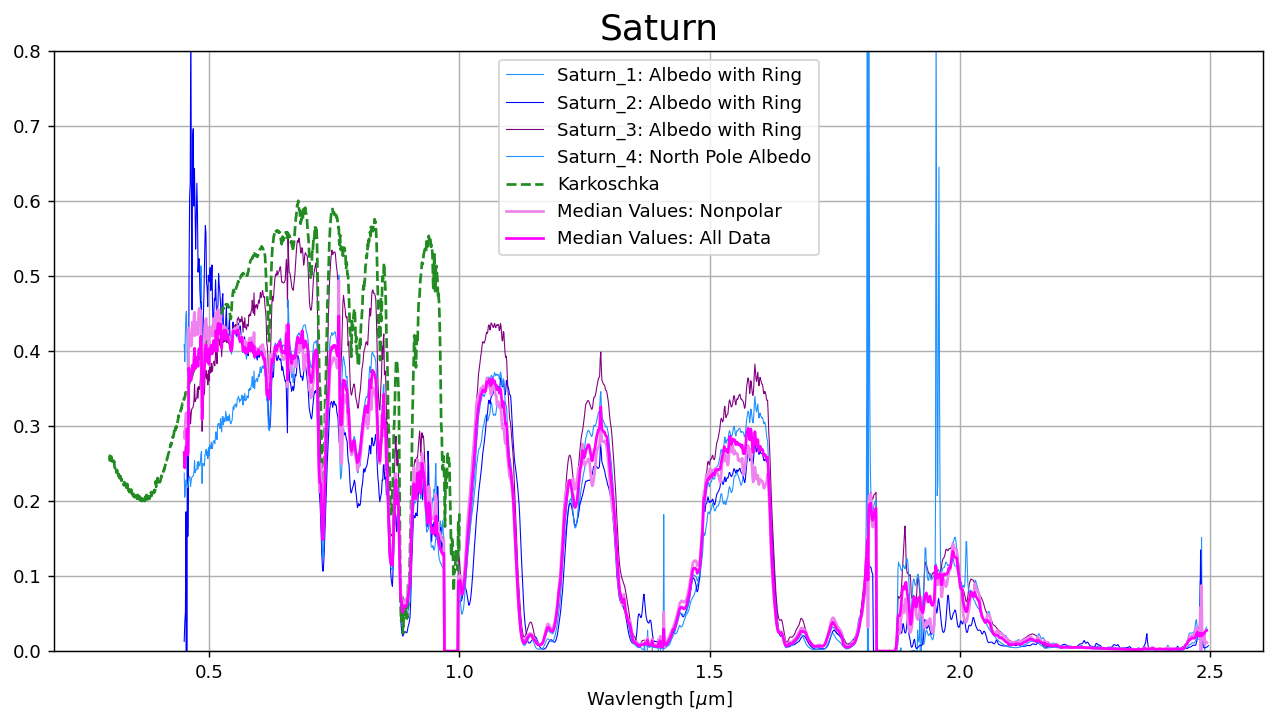

In [22]:
plt.figure(figsize=(12,6), dpi=130)
plt.plot(spec_1[:,0], spec_1[:,1], label='Saturn_1: Albedo with Ring', color= 'dodgerblue', linewidth=0.6)
plt.plot(spec_2[:,0], spec_2[:,1], label='Saturn_2: Albedo with Ring', color= 'blue', linewidth=0.6)
plt.plot(spec_3[:,0], spec_3[:,1], label='Saturn_3: Albedo with Ring', color= 'purple', linewidth=0.6)
plt.plot(spec_4[:,0], spec_4[:,1], label='Saturn_4: North Pole Albedo', color= 'dodgerblue', linewidth=0.6)
plt.plot(kark[:,0]/1000, kark[:,4], label= 'Karkoschka', linestyle='--', color='forestgreen')
#plt.plot(kark[:,0]/1000, kark[:,5]*0.66, label= 'Karkoschka', linestyle='dotted')
plt.plot(result_df['Median_Wav_nonpolar'], result_df['Median_nonpolar'], label='Median Values: Nonpolar', color= 'violet')
plt.plot(result_df['Median_Wav_all_vals'], result_df['Median_all_vals'], label='Median Values: All Data', color= 'magenta')
plt.ylim(0,0.8)
plt.legend()
plt.grid()
plt.xlabel('Wavlength [$\mu$m]')
plt.title('Saturn', size=20);

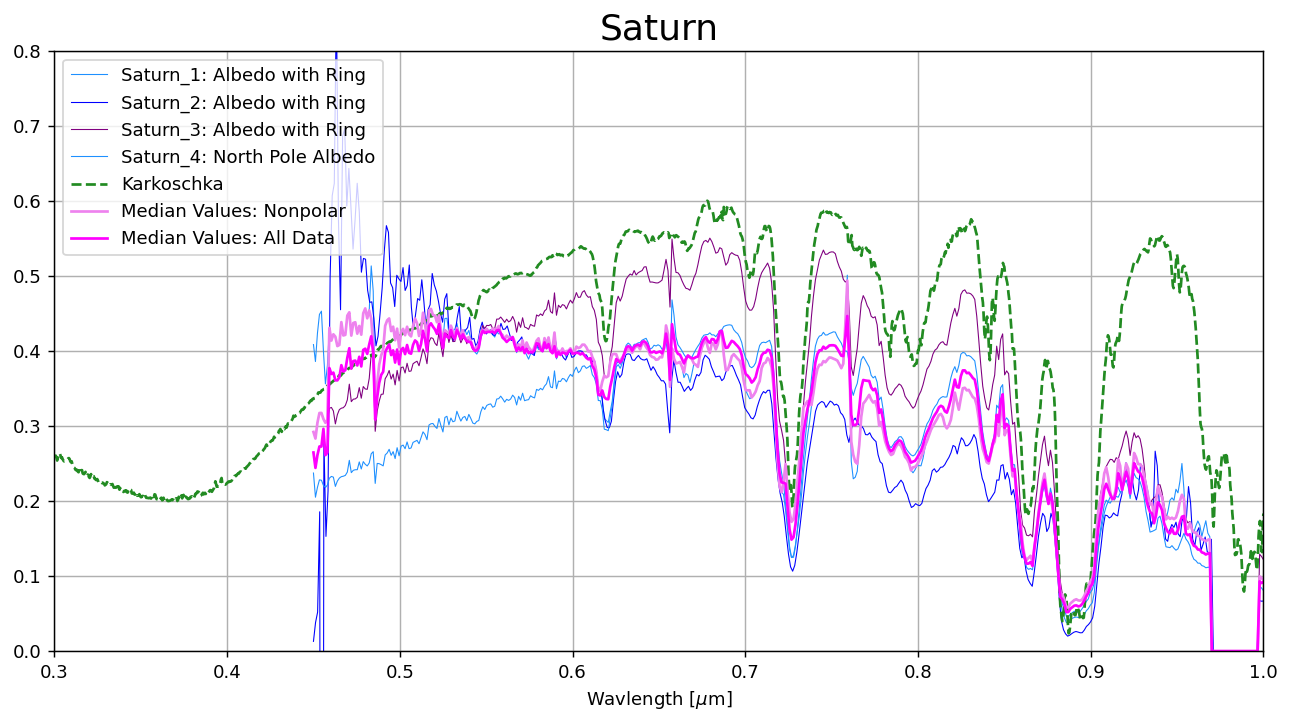

In [23]:
plt.figure(figsize=(12,6), dpi=130)
plt.plot(spec_1[:,0], spec_1[:,1], label='Saturn_1: Albedo with Ring', color= 'dodgerblue', linewidth=0.6)
plt.plot(spec_2[:,0], spec_2[:,1], label='Saturn_2: Albedo with Ring', color= 'blue', linewidth=0.6)
plt.plot(spec_3[:,0], spec_3[:,1], label='Saturn_3: Albedo with Ring', color= 'purple', linewidth=0.6)
plt.plot(spec_4[:,0], spec_4[:,1], label='Saturn_4: North Pole Albedo', color= 'dodgerblue', linewidth=0.6)
plt.plot(kark[:,0]/1000, kark[:,4], label= 'Karkoschka', linestyle='--', color='forestgreen')
#plt.plot(kark[:,0]/1000, kark[:,5]*0.66, label= 'Karkoschka', linestyle='dotted')
plt.plot(result_df['Median_Wav_nonpolar'], result_df['Median_nonpolar'], label='Median Values: Nonpolar', color= 'violet')
plt.plot(result_df['Median_Wav_all_vals'], result_df['Median_all_vals'], label='Median Values: All Data', color= 'magenta')
plt.ylim(0,0.8)
plt.xlim(0.3,1)
plt.legend()
plt.grid()
plt.xlabel('Wavlength [$\mu$m]')
plt.title('Saturn', size=20);

# Lundock081119 with Ring Albedo best matches Karkoschka data! 
- consider extending the spectrum with this reference data set
- consider why is it so much lower around 1 micron

# Comparing to data from CBF 2022

In [25]:
cbf_fig6= np.genfromtxt('/Users/apayne3/Desktop/Project_Part2_Colors/CBF_Figure6_Saturn.txt')
cbf_fig6

array([[ 39.64    ,   0.35054 ,  44.678152,   0.119065],
       [ 39.64    ,   0.35895 ,  42.127346,   0.112973],
       [ 39.64    ,   0.36629 ,  45.857722,   0.107358],
       ...,
       [101.07    ,   5.09889 ,   0.430276,   0.33681 ],
       [101.07    ,   5.1158  ,   0.501454,   0.397502],
       [101.07    ,   5.13242 ,   0.535102,   0.430165]])

In [35]:
cbf_fig6= np.genfromtxt('./../../../vary_params/saturn_spectra/dbf6.txt') # read in figure 6 from cbf paper
coulter_barnes_fortney_saturn_fig7= np.genfromtxt('./../../../vary_params/saturn_spectra/dbf7.txt')

phase_40_saturn=[]
phase_40_wavelength_saturn=[]
phase_40_albedo_saturn=[]
phase_60_saturn=[]
phase_60_wavelength_saturn=[]
phase_60_albedo_saturn=[]
phase_90_saturn=[]
phase_90_wavelength_saturn=[]
phase_90_albedo_saturn=[]
phase_110_saturn=[]
phase_110_wavelength_saturn=[]
phase_110_albedo_saturn=[]
for line in cbf_fig6:
    if line[0]<40:
        phase_40_saturn.append(line)
        phase_40_wavelength_saturn.append(line[1])
        phase_40_albedo_saturn.append(line[3])
    if line[0]>40 and line[0]<60:
        phase_60_saturn.append(line)
        phase_60_wavelength_saturn.append(line[1])
        phase_60_albedo_saturn.append(line[3])
    if line[0]>90 and line[0]<100:
        phase_90_saturn.append(line)
        phase_90_wavelength_saturn.append(line[1])
        phase_90_albedo_saturn.append(line[3])
    if line[0]>110:
        phase_110_saturn.append(line)
        phase_110_wavelength_saturn.append(line[1])
        phase_110_albedo_saturn.append(line[3])

albedo_cloudy_fig7=[]
wavelength_cloudy_fig7=[]
for line in coulter_barnes_fortney_saturn_fig7:
    if line[0]== 'a':
        albedo_cloudy_fig7.append(line[1])
        wavelength_cloudy_fig7.append(line[3])

In [27]:
os.getcwd()

'/Users/apayne3/Desktop/Project_Part2_Colors/madden_spectra/CatalogofSolarSystemObjects/Albedos'

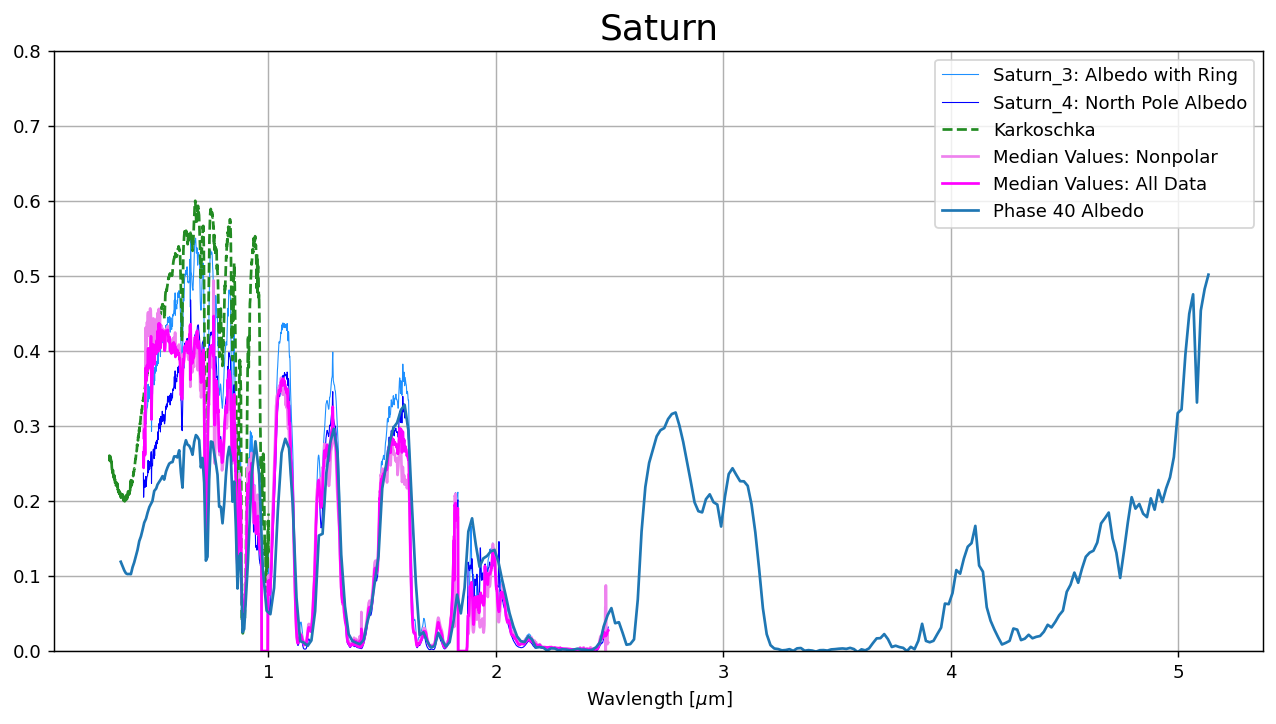

In [36]:
plt.figure(figsize=(12,6), dpi=130)
plt.plot(spec_3[:,0], spec_3[:,1], label='Saturn_3: Albedo with Ring', color= 'dodgerblue', linewidth=0.6)
plt.plot(spec_4[:,0], spec_4[:,1], label='Saturn_4: North Pole Albedo', color= 'blue', linewidth=0.6)
plt.plot(kark[:,0]/1000, kark[:,4], label= 'Karkoschka', linestyle='--', color='forestgreen')
#plt.plot(kark[:,0]/1000, kark[:,5]*0.66, label= 'Karkoschka', linestyle='dotted')
plt.plot(result_df['Median_Wav_nonpolar'], result_df['Median_nonpolar'], label='Median Values: Nonpolar', color= 'violet')
plt.plot(result_df['Median_Wav_all_vals'], result_df['Median_all_vals'], label='Median Values: All Data', color= 'magenta')
plt.plot(phase_40_wavelength_saturn, phase_40_albedo_saturn, label='Phase 40 Albedo')
plt.ylim(0,0.8)
plt.legend()
plt.grid()
plt.xlabel('Wavlength [$\mu$m]')
plt.title('Saturn', size=20);

# Consider the difference in conditions between lundock 3 and CBF

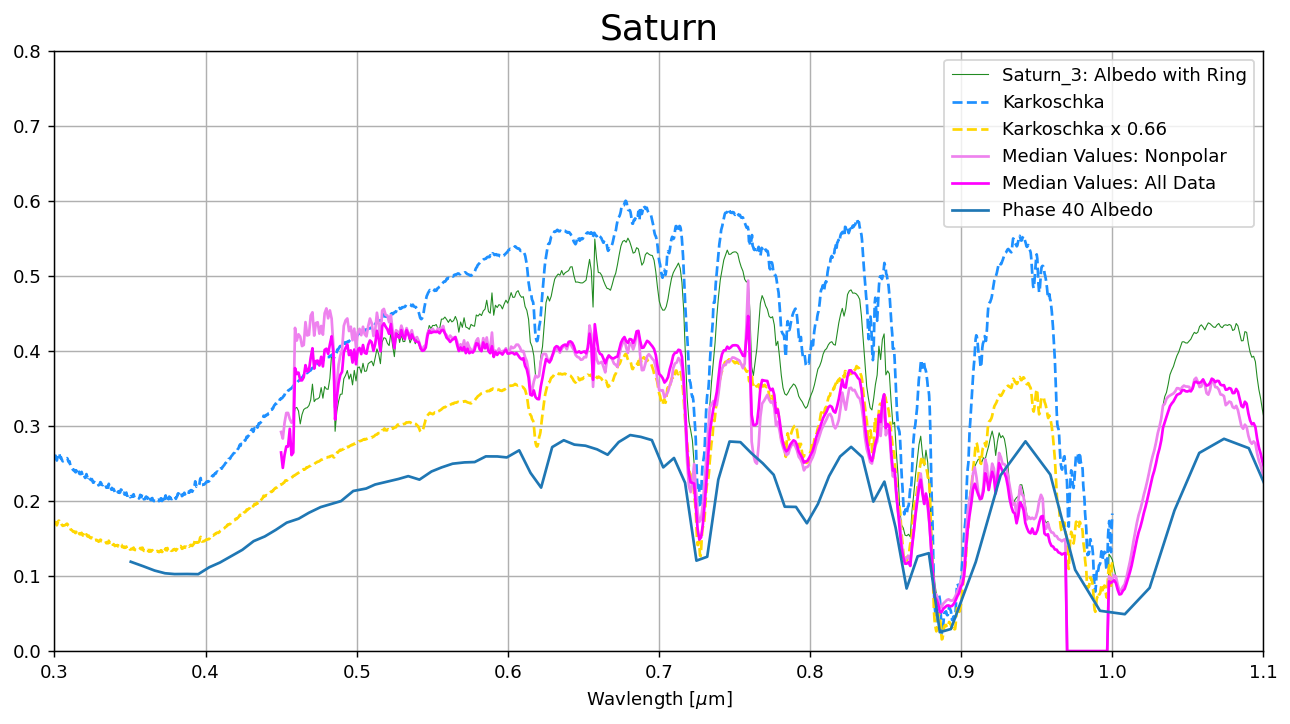

In [55]:
plt.figure(figsize=(12,6), dpi=130)
plt.plot(spec_3[:,0], spec_3[:,1], label='Saturn_3: Albedo with Ring', color= 'forestgreen', linewidth=0.6)
plt.plot(kark[:,0]/1000, kark[:,4], label= 'Karkoschka', linestyle='--', color='dodgerblue')
plt.plot(kark[:,0]/1000, kark[:,4]*0.66, label= 'Karkoschka x 0.66', linestyle='--', color='gold')
#plt.plot(kark[:,0]/1000, kark[:,5]*0.66, label= 'Karkoschka', linestyle='dotted')
plt.plot(result_df['Median_Wav_nonpolar'], result_df['Median_nonpolar'], label='Median Values: Nonpolar', color= 'violet')
plt.plot(result_df['Median_Wav_all_vals'], result_df['Median_all_vals'], label='Median Values: All Data', color= 'magenta')
plt.plot(phase_40_wavelength_saturn, phase_40_albedo_saturn, label='Phase 40 Albedo')
plt.ylim(0,0.8)
plt.xlim(0.3,1.1)
plt.legend()
plt.grid()
plt.xlabel('Wavlength [$\mu$m]')
plt.title('Saturn', size=20);

In [43]:
def get_scale_factor(phase_angle): # phase angle in degrees
    scale_val= (1/np.pi)*(np.sin(np.deg2rad(phase_angle))+(np.pi-np.deg2rad(phase_angle))*np.cos(np.deg2rad(phase_angle)))
    return scale_val 

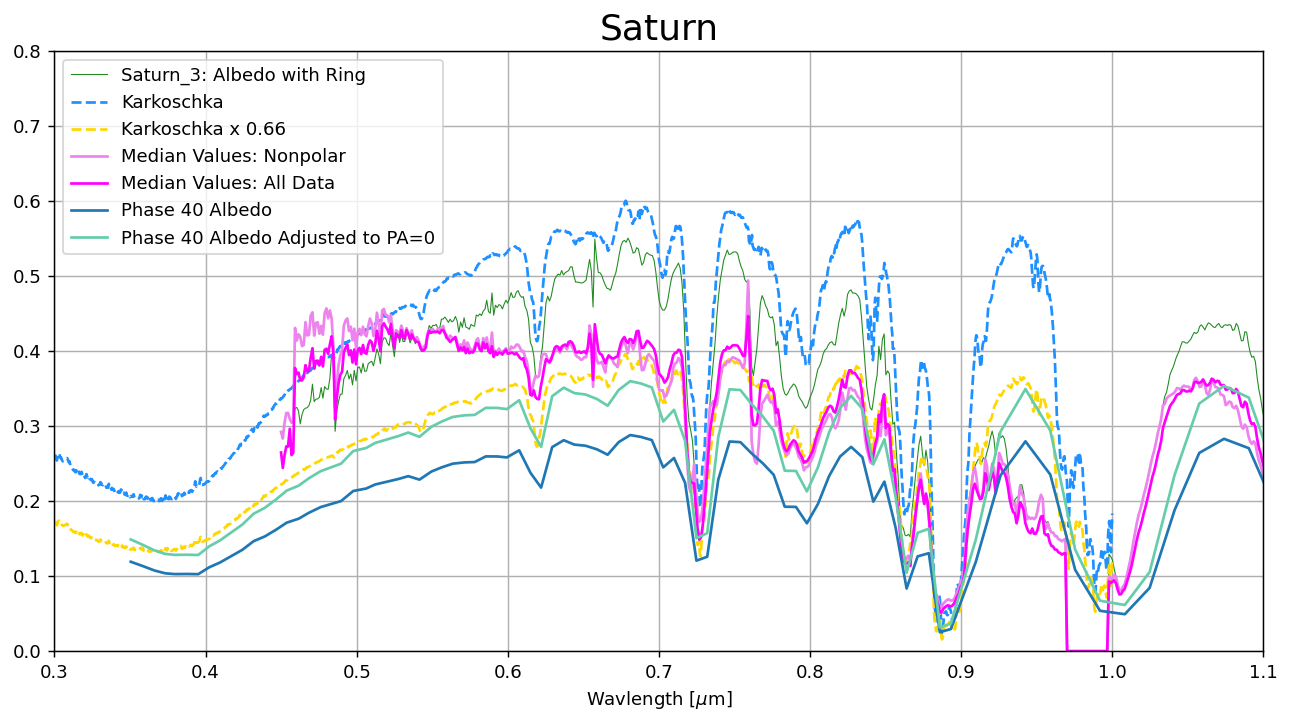

In [54]:
plt.figure(figsize=(12,6), dpi=130)
plt.plot(spec_3[:,0], spec_3[:,1], label='Saturn_3: Albedo with Ring', color= 'forestgreen', linewidth=0.6)
plt.plot(kark[:,0]/1000, kark[:,4], label= 'Karkoschka', linestyle='--', color='dodgerblue')
plt.plot(kark[:,0]/1000, kark[:,4]*0.66, label= 'Karkoschka x 0.66', linestyle='--', color='gold')
#plt.plot(kark[:,0]/1000, kark[:,5]*0.66, label= 'Karkoschka', linestyle='dotted')
plt.plot(result_df['Median_Wav_nonpolar'], result_df['Median_nonpolar'], label='Median Values: Nonpolar', color= 'violet')
plt.plot(result_df['Median_Wav_all_vals'], result_df['Median_all_vals'], label='Median Values: All Data', color= 'magenta')
plt.plot(phase_40_wavelength_saturn, phase_40_albedo_saturn, label='Phase 40 Albedo')
plt.plot(phase_40_wavelength_saturn, phase_40_albedo_saturn/(get_scale_factor(40)), label='Phase 40 Albedo Adjusted to PA=0', color='mediumaquamarine')
plt.ylim(0,0.8)
plt.xlim(0.3,1.1)
plt.legend()
plt.grid()
plt.xlabel('Wavlength [$\mu$m]')
plt.title('Saturn', size=20);

## The adjusted Karkoschka (multiply by 0.66) spectrum is almost identical to the phase 40 albedo for Saturn if it is divided by the phase angle coefficient for a 40 degree phase angle AND it agrees well with the median values of the Madden (Lundock) data
- need to look into the the differences in how the data may have been collected

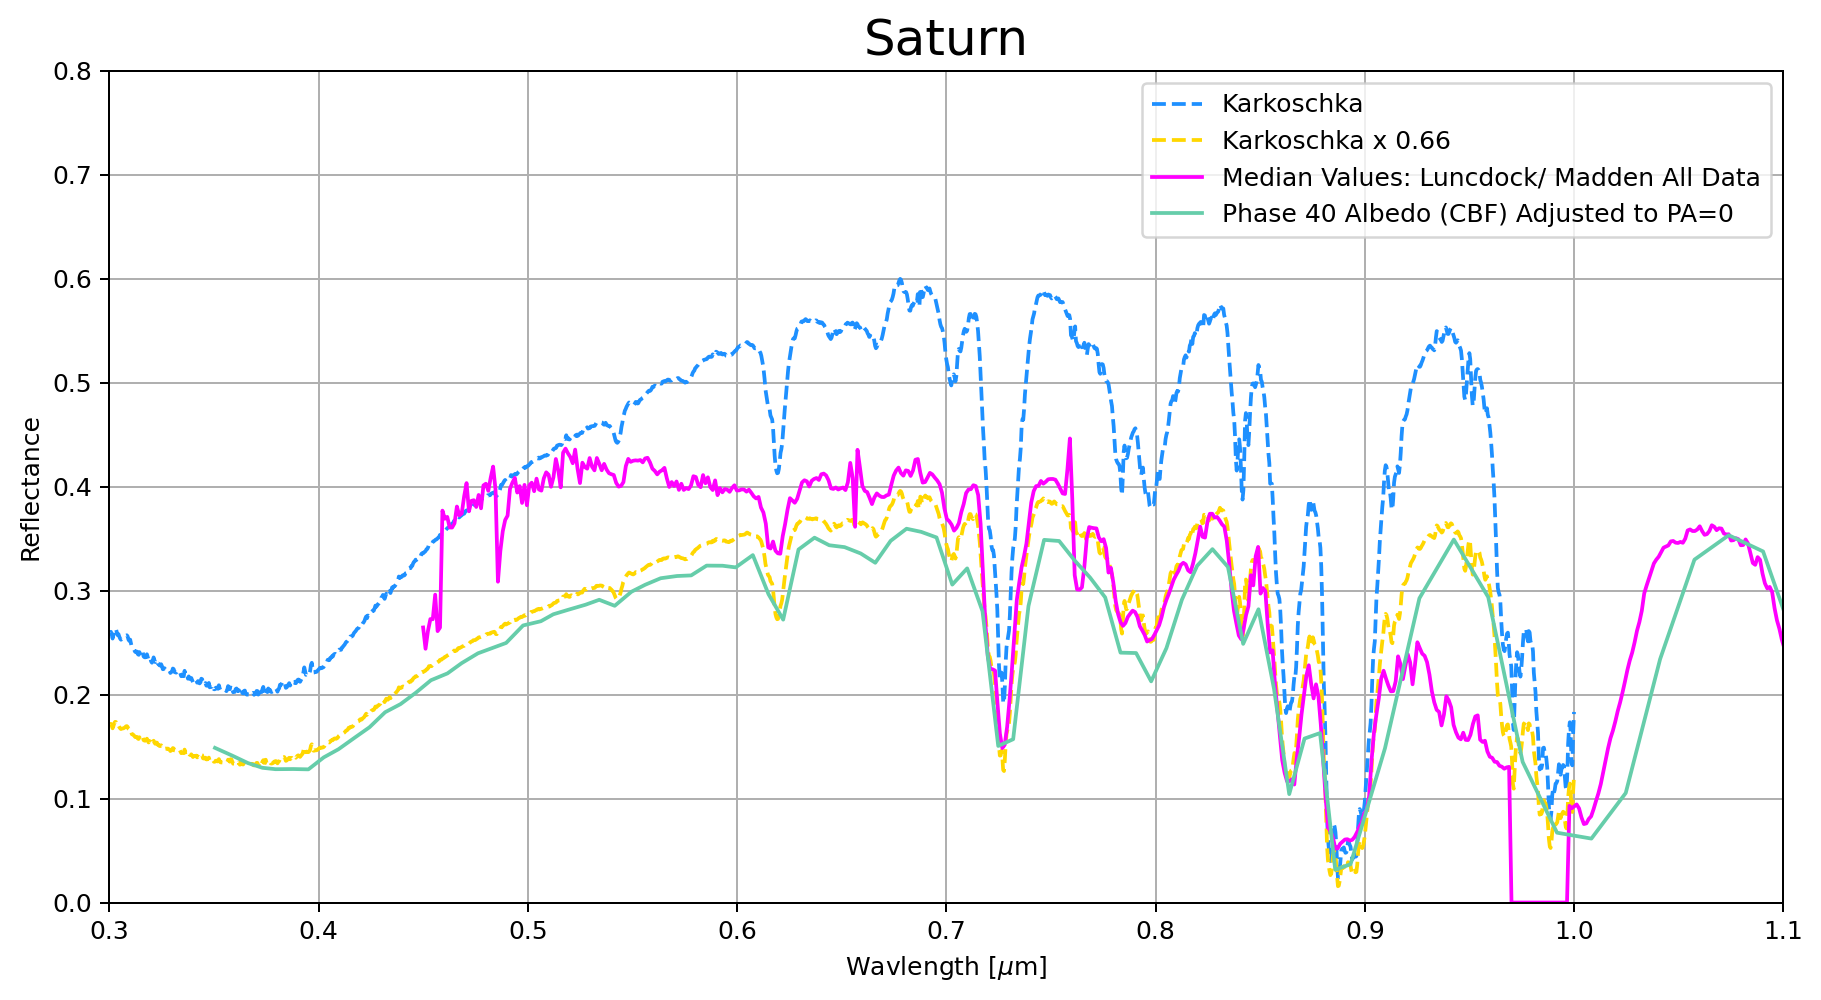

In [62]:
plt.figure(figsize=(12,6), dpi=180)
plt.plot(kark[:,0]/1000, kark[:,4], label= 'Karkoschka', linestyle='--', color='dodgerblue')
plt.plot(kark[:,0]/1000, kark[:,4]*0.66, label= 'Karkoschka x 0.66', linestyle='--', color='gold')
plt.plot(result_df['Median_Wav_all_vals'], result_df['Median_all_vals'], label='Median Values: Luncdock/ Madden All Data', color= 'magenta')
#plt.plot(phase_40_wavelength_saturn, phase_40_albedo_saturn, label='Phase 40 Albedo')
plt.plot(phase_40_wavelength_saturn, phase_40_albedo_saturn/(get_scale_factor(40)), label='Phase 40 Albedo (CBF) Adjusted to PA=0', color='mediumaquamarine')
plt.ylim(0,0.8)
plt.xlim(0.3,1.1)
plt.legend()
plt.grid()
plt.xlabel('Wavlength [$\mu$m]')
plt.ylabel('Reflectance')
plt.title('Saturn', size=20);

# Plot for the powerpoint
- need to add the units fo each of the data sets to the legend of this plot

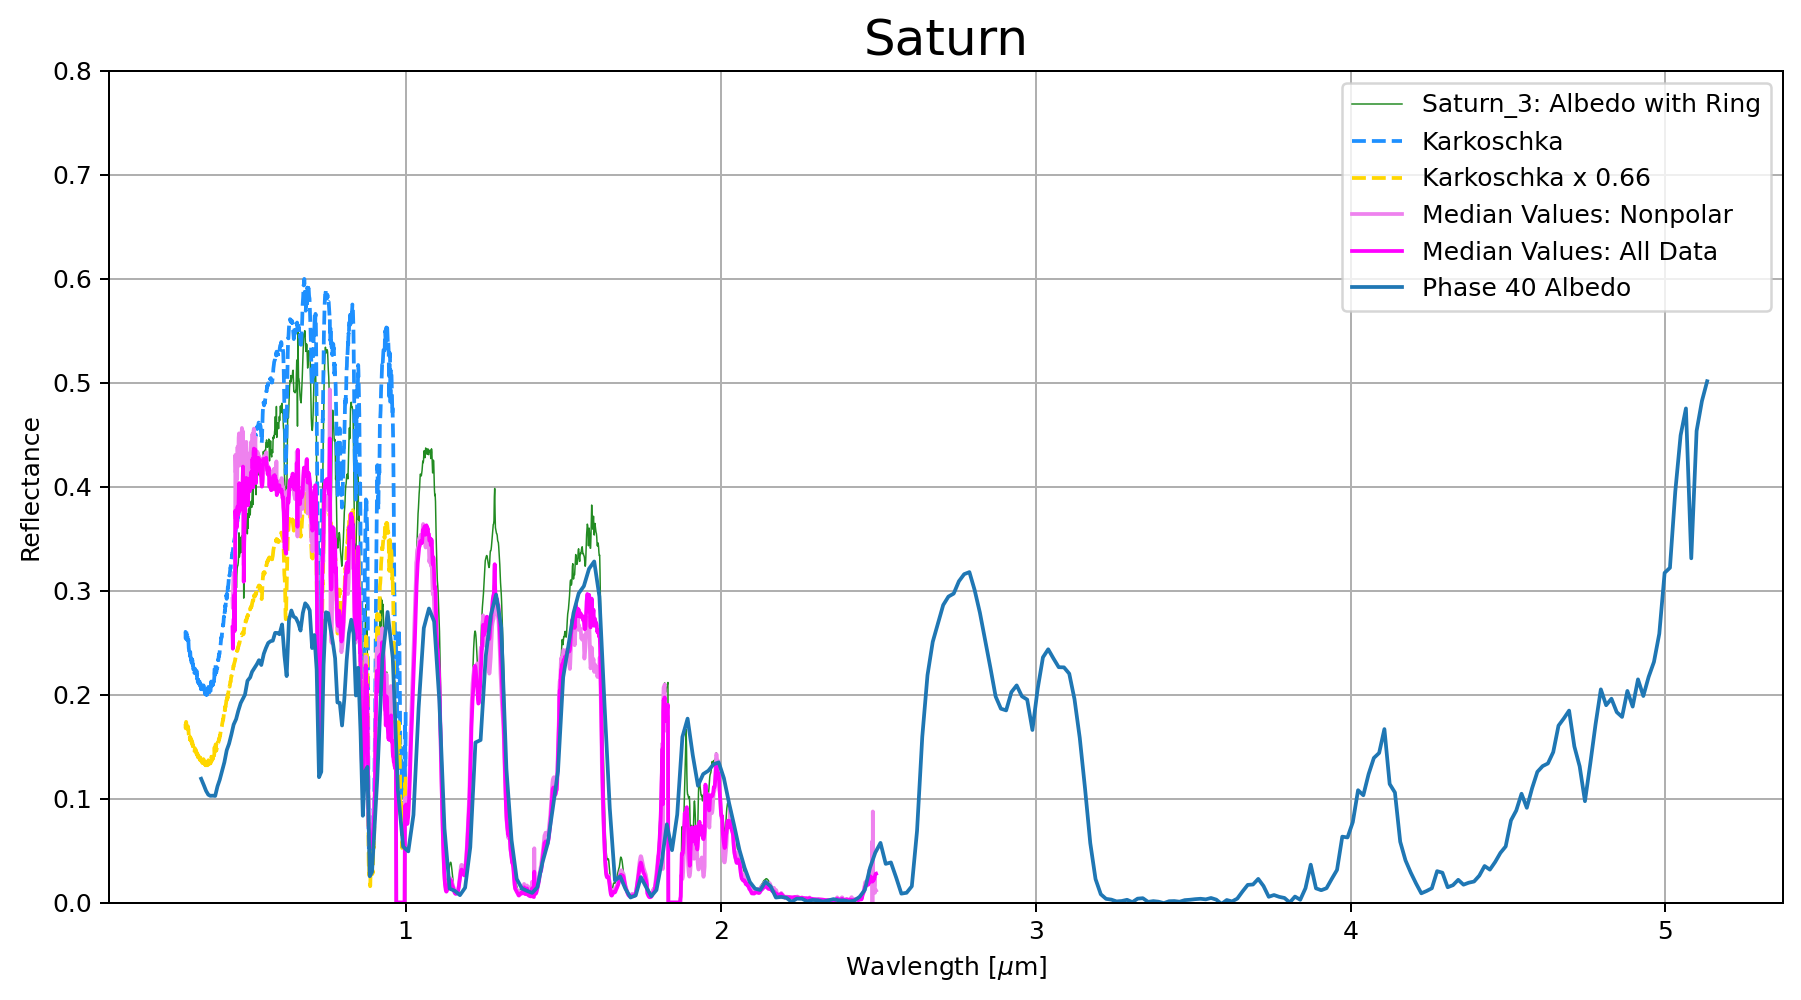

In [58]:
plt.figure(figsize=(12,6), dpi=180)
plt.plot(spec_3[:,0], spec_3[:,1], label='Saturn_3: Albedo with Ring', color= 'forestgreen', linewidth=0.6)
plt.plot(kark[:,0]/1000, kark[:,4], label= 'Karkoschka', linestyle='--', color='dodgerblue')
plt.plot(kark[:,0]/1000, kark[:,4]*0.66, label= 'Karkoschka x 0.66', linestyle='--', color='gold')
#plt.plot(kark[:,0]/1000, kark[:,5]*0.66, label= 'Karkoschka', linestyle='dotted')
plt.plot(result_df['Median_Wav_nonpolar'], result_df['Median_nonpolar'], label='Median Values: Nonpolar', color= 'violet')
plt.plot(result_df['Median_Wav_all_vals'], result_df['Median_all_vals'], label='Median Values: All Data', color= 'magenta')
plt.plot(phase_40_wavelength_saturn, phase_40_albedo_saturn, label='Phase 40 Albedo')
plt.ylim(0,0.8)
plt.legend()
plt.grid()
plt.xlabel('Wavlength [$\mu$m]')
plt.ylabel('Reflectance')
plt.title('Saturn', size=20);